<a href="https://colab.research.google.com/github/jjdub82/...../blob/master/Stock_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
pip install pandas table plotting


In [ ]:
pip install yfinance

In [ ]:
pip install dataframe-image

In [ ]:
pip install fpdf2

In [93]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import requests
from PIL import Image
%matplotlib inline

In [94]:
from datetime import date
from datetime import datetime
from datetime import timedelta
today = str(date.today())
current_year = date.today().year

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from numpy import array
from matplotlib import ticker

In [96]:
from fpdf import FPDF

# Company Selection

In [97]:
ticker = yf.Ticker(input("Enter Ticker\n"))

Enter Ticker
RTX


In [98]:
recommendations_df = ticker.recommendations
recommendations_df.reset_index(inplace=True)
recommendations_df.columns


Index(['Date', 'Firm', 'To Grade', 'From Grade', 'Action'], dtype='object')

In [99]:
ticker.info
book_value = str(ticker.info['bookValue'])
fifty_day_avg_price = str(ticker.info['fiftyDayAverage'])
fifty_two_high = str(ticker.info['fiftyTwoWeekHigh'])
fifty_two_low = str(ticker.info['fiftyTwoWeekLow'])
forward_PE = str(ticker.info['forwardPE'])
forward_EPS = str(ticker.info['forwardEps'])
peg_ratio = str(ticker.info['pegRatio'])
price_to_book = str(ticker.info['priceToBook'])
target_low_price = str(ticker.info['targetLowPrice'])
target_median_price = str(ticker.info['targetMedianPrice'])
market_cap_str = str(ticker.info['marketCap'])
market_cap_num = ticker.info['marketCap']

In [100]:
free_cash_ttm = ticker.info['freeCashflow']

In [101]:
last_year = datetime.today() - timedelta(days=365)
print(last_year)

2020-08-28 10:12:27.122703


In [102]:
pe_ratio = ticker.info['trailingPE']

In [103]:
recommendations_df['Year'] = recommendations_df['Date'].dt.year
current_recommendations_1yr = recommendations_df.loc[recommendations_df['Date']>=last_year]
current_recommendations_1mo = recommendations_df.loc[recommendations_df['Date']>=datetime.today() - timedelta(days=31)]
current_recommendations_3mo = recommendations_df.loc[recommendations_df['Date']>=datetime.today() - timedelta(days=90)]
current_recommendations_6mo = recommendations_df.loc[recommendations_df['Date']>=datetime.today() - timedelta(days=180)]
current_recommendations_6mo


,Date,Firm,To Grade,From Grade,Action,Year
10,2021-04-09 10:25:10,Wolfe Research,Outperform,,init,2021
11,2021-04-12 12:14:43,Susquehanna,Positive,,main,2021
12,2021-04-14 13:42:17,Credit Suisse,Outperform,,main,2021
13,2021-04-28 13:24:50,Morgan Stanley,Overweight,,main,2021
14,2021-05-07 14:57:35,Redburn Partners,Buy,,init,2021
15,2021-05-13 10:52:19,Wells Fargo,Equal-Weight,,init,2021
16,2021-05-19 13:33:04,Credit Suisse,Outperform,,main,2021
17,2021-06-03 13:22:00,Jefferies,Buy,,main,2021
18,2021-07-28 12:19:50,Susquehanna,Positive,,main,2021
19,2021-07-29 12:14:52,Argus Research,Buy,Hold,up,2021


In [104]:
ticker.info['grossMargins']

0.16600999

In [105]:
gross_margin = ticker.info['grossMargins']
market_cap = ticker.info['marketCap']
shares_outstanding = ticker.info['sharesOutstanding']

In [106]:
finance = ticker.financials

FINANCE STATEMENT DATAFRAMES

In [107]:
finance = finance.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')

In [108]:
finance.index.name = 'Category'
finance

,2020,2019,2018,2017
Category,,,,
Research Development,2.582e+09,2.452e+09,1.878e+09,2.427e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,-2.353e+09,4.152e+09,2.504e+09,7.763e+09
Minority Interest,1.721e+09,2.552e+09,2.273e+09,1.942e+09
Net Income,-3.519e+09,5.537e+09,5.269e+09,4.552e+09
Selling General Administrative,4.116e+09,2.94e+09,2.093e+09,5.856e+09
Gross Profit,9.017e+09,1.0932e+10,7.236e+09,1.5636e+10
Ebit,2.485e+09,5.775e+09,3.648e+09,8.145e+09
Operating Income,2.485e+09,5.775e+09,3.648e+09,8.145e+09


In [109]:
sga_list = list(finance.loc['Selling General Administrative'])
ebit_list = list(finance.loc['Ebit'])
income_tax_list = list(finance.loc['Income Tax Expense'])
interest_list = list(finance.loc['Interest Expense'])

In [110]:
bal_sheet = ticker.balancesheet
bal_sheet = bal_sheet.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
bal_sheet.index.name = 'Category'

cashflow = ticker.cashflow
cashflow = cashflow.set_axis(['2020', '2019', '2018', '2017'], axis = 'columns')
cashflow.index.name = 'Category'


In [111]:
operating_margins = ticker.info['operatingMargins']

In [112]:
operating_cashflow = ticker.info['operatingCashflow']

In [113]:
df_fin = finance.loc[['Operating Income','Net Income','Research Development','Cost Of Revenue', 'Total Revenue', 'Total Operating Expenses', 'Gross Profit']]

In [114]:
df_fin

,2020,2019,2018,2017
Category,,,,
Operating Income,2.485e+09,5.775e+09,3.648e+09,8.145e+09
Net Income,-3.519e+09,5.537e+09,5.269e+09,4.552e+09
Research Development,2.582e+09,2.452e+09,1.878e+09,2.427e+09
Cost Of Revenue,4.757e+10,3.4417e+10,2.7465e+10,4.4201e+10
Total Revenue,5.6587e+10,4.5349e+10,3.4701e+10,5.9837e+10
Total Operating Expenses,5.4102e+10,3.9574e+10,3.1053e+10,5.1692e+10
Gross Profit,9.017e+09,1.0932e+10,7.236e+09,1.5636e+10


In [115]:
operating_income_list = list(df_fin.loc['Operating Income'])
net_income_list = list(df_fin.loc['Net Income'])
research_list = list(df_fin.loc['Research Development'])
cost_of_revenue = list(df_fin.loc['Cost Of Revenue'])
total_revenue_list = list(df_fin.loc['Total Revenue'])
total_Operating_expense_list = list(df_fin.loc['Total Operating Expenses'])
gross_profit_list = list(df_fin.loc['Gross Profit'])

In [116]:
growth_rate = (total_revenue_list[0]-total_revenue_list[1])/total_revenue_list[1]
print(growth_rate)

0.24781141811285806


In [117]:
cashflow

,2020,2019,2018,2017
Category,,,,
Change To Liabilities,-5.370000e+08,2.345000e+09,3.063000e+09,1.571000e+09
Total Cashflows From Investing Activities,3.102000e+09,-3.092000e+09,-1.697300e+10,-3.019000e+09
Net Borrowings,-1.611900e+10,-1.816000e+09,1.044700e+10,3.079000e+09
Total Cash From Financing Activities,-5.274000e+09,-4.564000e+09,7.965000e+09,-9.930000e+08
Change To Operating Activities,-4.450000e+08,-9.840000e+08,-6.450000e+08,-1.010000e+08
Issuance Of Stock,1.500000e+07,2.700000e+07,3.600000e+07,3.100000e+07
Net Income,-3.519000e+09,5.537000e+09,5.269000e+09,4.552000e+09
Change In Cash,1.412000e+09,1.208000e+09,-2.806000e+09,1.829000e+09
Repurchase Of Stock,-4.700000e+07,-1.510000e+08,-3.250000e+08,-1.453000e+09


In [118]:
capX_list = list(cashflow.loc['Capital Expenditures'])
depreciation_list = list(cashflow.loc['Depreciation'])

In [119]:
df_cash = cashflow.loc[['Depreciation', 'Net Income']]

In [120]:
df_bal = bal_sheet.loc[['Cash', 'Inventory']]

In [121]:
cash_list = list(bal_sheet.loc['Cash'])
cash_list

[8802000000.0, 4937000000.0, 6152000000.0, 8985000000.0]

In [122]:
research_list

[2582000000.0, 2452000000.0, 1878000000.0, 2427000000.0]

In [123]:
total_revenue_list

[56587000000.0, 45349000000.0, 34701000000.0, 59837000000.0]

In [124]:
gross_margins_list = [gross_profit_list[0] /  total_revenue_list[0], gross_profit_list[1] /  total_revenue_list[1], gross_profit_list[2] /  total_revenue_list[2], gross_profit_list[3] /  total_revenue_list[3]]
print(gross_margins_list)

[0.15934755332496864, 0.241063750027564, 0.2085242500216132, 0.2613098918729214]


In [125]:
SGA_Ratio = [sga_list[0]/ gross_profit_list[0], sga_list[1]/ gross_profit_list[1], sga_list[2]/ gross_profit_list[2], sga_list[3]/ gross_profit_list[3]]
print(SGA_Ratio)

[0.4564711101253188, 0.2689352360043908, 0.2892482034273079, 0.37452033768227166]


In [126]:
try:
  research_ratio = [research_list[0] / gross_profit_list[0],research_list[1] / gross_profit_list[1],research_list[2] / gross_profit_list[2],research_list[3] / gross_profit_list[3]]
  print(research_ratio)
except:
  print('None')

[0.28634800931573695, 0.22429564581046468, 0.2595356550580431, 0.1552187260168841]


In [127]:
depreciation_ratio = [depreciation_list[0] / gross_profit_list [0], depreciation_list[1] / gross_profit_list [1], depreciation_list[2] / gross_profit_list [2], depreciation_list[3] / gross_profit_list [3]]
print(depreciation_ratio)

[0.4609071753354774, 0.24771313574826198, 0.2620232172470978, 0.13686364799181377]


In [128]:
interest_ratio = [interest_list[0] / gross_profit_list[0], interest_list[1] / gross_profit_list[1], interest_list[2] / gross_profit_list[2], interest_list[3] / gross_profit_list[3]]
print(interest_ratio)

[-0.15614949539758236, -0.15651298938894986, -0.16334991708126037, -0.0650422102839601]


In [129]:
operating_cashflow_list = list(cashflow.loc['Total Cash From Operating Activities'])
free_cashflow_list = [operating_cashflow_list[0] + capX_list[0], operating_cashflow_list[1] + capX_list[1], operating_cashflow_list[2] + capX_list[2], operating_cashflow_list[3] + capX_list[3]]
print(free_cashflow_list)

[1811000000.0, 7015000000.0, 4855000000.0, 3617000000.0]


In [130]:
#ttm_cash = float(free_cash_flow_manual[0])
last_year_cash = float(free_cashflow_list[0])
two_year_cash = float(free_cashflow_list[1])
three_year_cash = float(free_cashflow_list[2])
four_year_cash = float(free_cashflow_list[3])


In [131]:
cashflow_growth_rate = [(last_year_cash- two_year_cash)/ two_year_cash, (two_year_cash - three_year_cash)/ three_year_cash, (three_year_cash - four_year_cash)/ four_year_cash]
print(cashflow_growth_rate)

[-0.7418389166072701, 0.44490216271884653, 0.34227260160353884]


In [132]:
dividend = ticker.info['dividendRate']
print(dividend)

2.04


In [133]:
earnings_df = ticker.earnings
earnings_list = list(ticker.earnings['Earnings'])
print(earnings_list)
eps_est_list = [earnings_list[0] / shares_outstanding, earnings_list[1] / shares_outstanding, earnings_list[2] / shares_outstanding]
print(eps_est_list)


[4552000000, 5269000000, 5537000000, -3519000000]
[3.018807990824012, 3.4943100403452814, 3.6720430239878197]


In [134]:
total_assets_list = list(bal_sheet.loc['Total Assets'])
liability_list = list(bal_sheet.loc['Total Liab'])
Shareholdr_equity_list = [total_assets_list[0]-liability_list[0], total_assets_list[1]-liability_list[1], total_assets_list[2]-liability_list[2], total_assets_list[3]-liability_list[3]]

print(total_assets_list)
print(liability_list)
print(Shareholdr_equity_list)

[162153000000.0, 139615000000.0, 134211000000.0, 96920000000.0]
[88269000000.0, 95289000000.0, 93492000000.0, 65368000000.0]
[73884000000.0, 44326000000.0, 40719000000.0, 31552000000.0]


In [135]:
dividend_rate = str(ticker.info['dividendRate'])
dividend_yield2 = str(ticker.info['dividendYield'])
try:
  dividend_yield = "{:.2%}".format(ticker.info['dividendYield'])
except: 
  print('No Divs')
print(dividend_yield)

2.39%




```
# This is formatted as code
```

# Data Conversions

In [136]:
current_priceSTR= str(ticker.info['currentPrice'])
gross_margin_current = f"{gross_margin:.2%}"
gross_margin_hist = []
for i in gross_margins_list:
  gross_margin_hist.append(f"{i:.2%}")

print(gross_margin_hist)

gross_marginSTR= ', '.join(map(str, gross_margin_hist))
  
print(gross_marginSTR)

['15.93%', '24.11%', '20.85%', '26.13%']
15.93%, 24.11%, 20.85%, 26.13%


In [137]:
years = [current_year - 1,current_year - 2, current_year - 3,current_year - 4]

def merge(list1, list2):
      
    merged_list = tuple(zip(list1, list2)) 
    return merged_list
      
# Driver code
earnings_tuples = merge(years, earnings_list)
free_cash_merge = merge(years, free_cashflow_list)
gross_margin_tuples = (merge(years, gross_margin_hist))
SGA_Ratio_tuples = (merge(years,SGA_Ratio))
research_ratio_tuples = merge(years,research_ratio)
cashflow_growth = merge(years,cashflow_growth_rate)
gross_profit_merge = merge(years,gross_profit_list)
total_revenue_merge = merge(years,total_revenue_list)

print(cashflow_growth)

((2020, -0.7418389166072701), (2019, 0.44490216271884653), (2018, 0.34227260160353884))


In [138]:
# create DataFrame using data
def tuples_to_df(tuple):
  new_df = pd.DataFrame(tuple, columns =['Years', 'Measure'])
  return new_df
  

sga_df = tuples_to_df(SGA_Ratio_tuples)
research_df = tuples_to_df(research_ratio_tuples)
research_df.Measure = (research_df.Measure * 100).round(decimals=2)
gross_margin_df = tuples_to_df(gross_margin_tuples)
cashflow_growth_df = tuples_to_df(cashflow_growth).round(decimals=2)
grossprofit_df = tuples_to_df(gross_profit_merge).round(decimals=2)
total_revenue_df = tuples_to_df(total_revenue_merge)
free_cash_df = tuples_to_df(free_cash_merge)
earnings_df = tuples_to_df(earnings_tuples)
free_cash_df

,Years,Measure
0,2020,1.811000e+09
1,2019,7.015000e+09
2,2018,4.855000e+09
3,2017,3.617000e+09


In [139]:
free_cashflow_list

[1811000000.0, 7015000000.0, 4855000000.0, 3617000000.0]

In [140]:
total_revenue_df

,Years,Measure
0,2020,5.658700e+10
1,2019,4.534900e+10
2,2018,3.470100e+10
3,2017,5.983700e+10


In [141]:
earnings_df

,Years,Measure
0,2020,4552000000
1,2019,5269000000
2,2018,5537000000
3,2017,-3519000000


# Charts and Tables

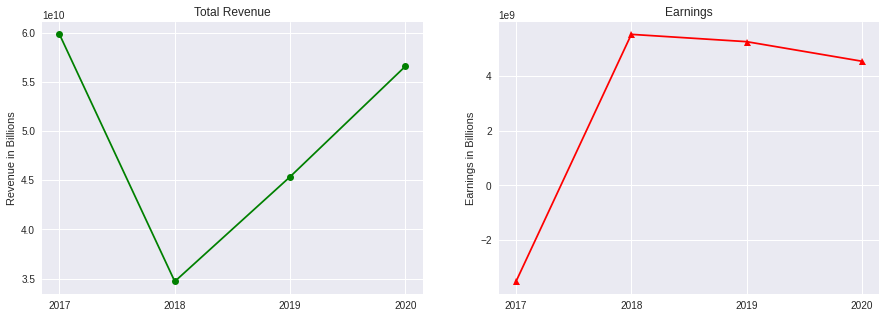

<Figure size 432x288 with 0 Axes>

In [142]:
fig3 = plt.figure(3,(15,5))
rev_plot= fig3.add_subplot(121)
rev_plot.plot(total_revenue_df.Years,total_revenue_df.Measure, 'go-')
rev_plot.set_ylabel('Revenue in Billions')
rev_plot.set_title('Total Revenue')
rev_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
earnings_plot = fig3.add_subplot(122)
earnings_plot.plot(earnings_df.Years, earnings_df.Measure, 'r^-')
earnings_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
earnings_plot.set_title('Earnings')
earnings_plot.set_ylabel('Earnings in Billions')
plt.show()
plt.savefig('earnings and revenue.png')
fig3.savefig('earnings and revenue.png')

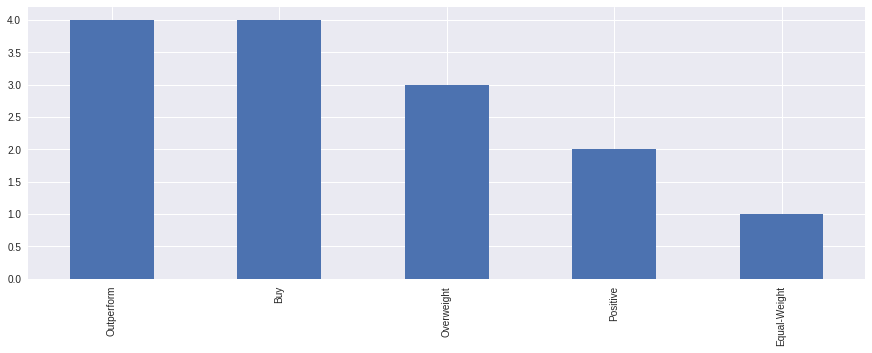

<Figure size 432x288 with 0 Axes>

In [143]:
current_recommendations_1yr['To Grade'].value_counts().plot(kind = 'bar', figsize=(15,5))
plt.show()
plt.savefig('recommendations bar chart.png')

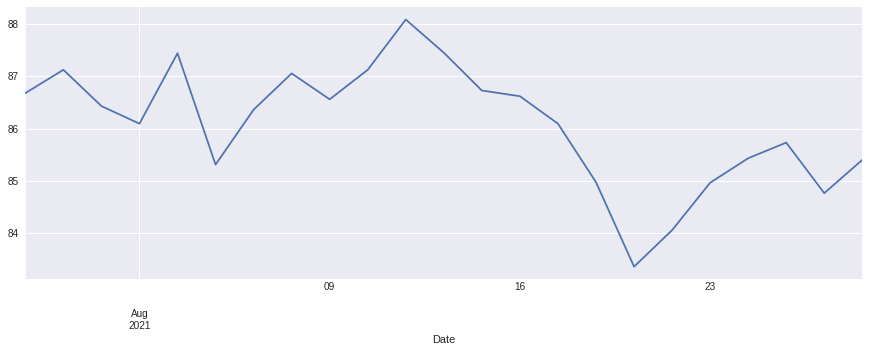

In [144]:
ticker_hist = ticker.history()
closing_prices =ticker_hist['Close']
closing_prices.plot(kind = 'line', figsize = (15,5))
plt.xlabel = 'Date'
plt.ylabel = 'Closing Price'
plt.savefig('close price fig.jpg')

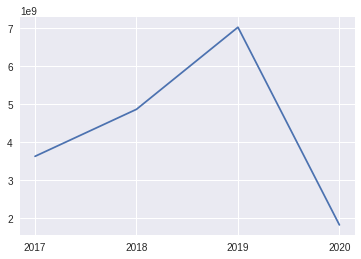

In [145]:
cashflow_dict = {'index':[0,1,2,3], 'period': ['2020', '2019', '2018', '2017'], 'cashflow':[last_year_cash,two_year_cash,three_year_cash,four_year_cash]}
    
   # 'ttm': ttm_cash, '2020': last_year_cash, '2019': two_year_cash, '2018': three_year_cash, '2017': four_year_cash}
cashflow_dataframe = pd.DataFrame.from_dict(cashflow_dict)
cashflow_dataframe = cashflow_dataframe.sort_values(by= 'index', ascending=False)
plt.plot(cashflow_dataframe.period, cashflow_dataframe.cashflow)
plt.show()

In [146]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [147]:
plt.style.use('seaborn')

In [148]:
gross_margin_df = gross_margin_df.sort_index(ascending=False)

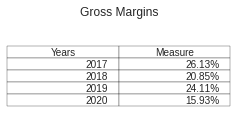

In [149]:
fig, ax =plt.subplots(figsize=(4,2))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = gross_margin_df.values,colLabels=sga_df.columns,loc='center')
ax.set_title('Gross Margins')

plt.savefig('sgaTbl.png')

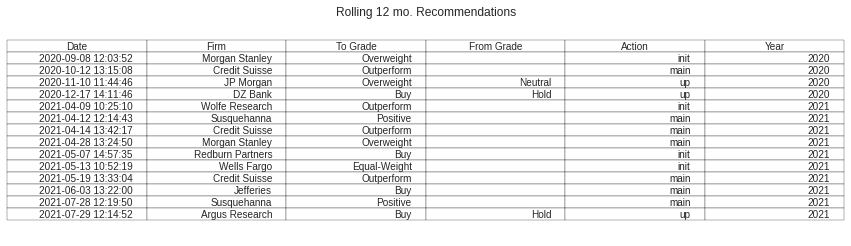

In [150]:
fig, ax =plt.subplots(figsize=(15,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = current_recommendations_1yr.values,colLabels=current_recommendations_6mo.columns,loc='center')
ax.set_title('Rolling 12 mo. Recommendations')
plt.savefig('Recommendations.png')

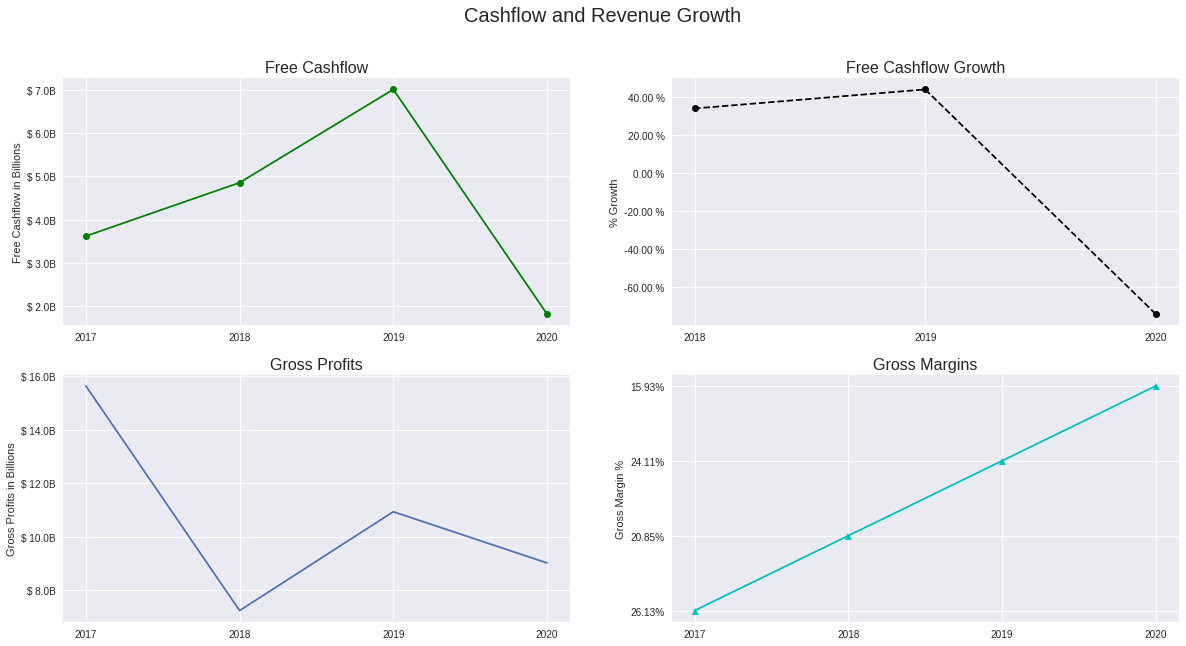

In [151]:
fig1 = plt.figure(1,figsize= (20,10))
fig1.suptitle('Cashflow and Revenue Growth', fontsize = 20)

def billionsFormatter(x, pos):
  return "$ {0}B".format(x/1000000000)

def percentFormatter(x,pos):
  return "{0:0.2f} %".format(x*100)


free_cash_plot = fig1.add_subplot(221)
free_cash_growth = fig1.add_subplot(222)
gross_margin_growth = fig1.add_subplot(224)
gross_profit_chart = fig1.add_subplot(223)

free_cash_plot.plot(cashflow_dataframe.period, cashflow_dataframe.cashflow, 'go-')
free_cash_plot.set_ylabel('Free Cashflow in Billions')
free_cash_plot.set_title('Free Cashflow', fontsize = 16)
free_cash_plot.yaxis.set_major_formatter(plt.FuncFormatter(billionsFormatter))


free_cash_growth.plot(cashflow_growth_df.Years, cashflow_growth_df.Measure, 'ko--')
free_cash_growth.xaxis.set_major_locator(MaxNLocator(integer=True))
free_cash_growth.set_ylabel('% Growth')
free_cash_growth.set_title('Free Cashflow Growth', fontsize = 16)
#free_cash_growth.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
free_cash_growth.yaxis.set_major_formatter(plt.FuncFormatter(percentFormatter))

gross_margin_growth.plot(gross_margin_df.Years, gross_margin_df.Measure, 'c^-')
gross_margin_growth.xaxis.set_major_locator(MaxNLocator(integer=True))
gross_margin_growth.set_ylabel('Gross Margin %')
gross_margin_growth.set_title('Gross Margins', fontsize = 16)
#gross_margin_growth.set_ylim(20, 80)


gross_profit_chart.plot(grossprofit_df.Years, grossprofit_df.Measure)
gross_profit_chart.xaxis.set_major_locator(MaxNLocator(integer=True))
gross_profit_chart.set_ylabel('Gross Profits in Billions')
gross_profit_chart.set_title('Gross Profits', fontsize = 16)
#gross_profit_chart.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:0.2f}'))
gross_profit_chart.yaxis.set_major_formatter(plt.FuncFormatter(billionsFormatter))


plt.show()

fig1.savefig('profits and cash.png')



In [152]:
(current_recommendations_6mo['To Grade'])

10      Outperform
11        Positive
12      Outperform
13      Overweight
14             Buy
15    Equal-Weight
16      Outperform
17             Buy
18        Positive
19             Buy
Name: To Grade, dtype: object

# Value Models


EPS Method

In [153]:
trailing_eps = ticker.info['trailingEps']
five_yr_intrinsic = (trailing_eps * (1+.12)**5) * pe_ratio
Fair_Market_Value_EPS_Method = str("${:,.2f}".format(five_yr_intrinsic/(1+.10)**5))
Fair_Market_Value_EPS_Method

'$93.45'

Discounted Free Cashflow Model

In [154]:
year_zero = free_cashflow_list[0]
year_neg_one = free_cashflow_list[1]
year_neg_two = free_cashflow_list[2]
year_neg_three = free_cashflow_list[3]

proceed = input('Do you want to append TTM? y/n:  ')
if proceed == 'y':
  append_ttm = float(input('Enter TTM Free Cashflow'))
  free_cashflow_list.append(append_ttm)
  fcf_growth = [
                (year_neg_two - year_neg_three) / year_neg_three, 
                (year_neg_one - year_neg_two) / year_neg_two, 
                (year_zero - year_neg_one) / year_neg_one, 
                (float(free_cashflow_list[4]) - year_zero) / year_zero
                ]
  year = [1, 2, 3, 4]
  fcf_list_new = [year_neg_three, year_neg_two, year_neg_one, year_zero, append_ttm]
else: 
  fcf_growth = [
                (year_neg_two - year_neg_three) / year_neg_three, 
                (year_neg_one - year_neg_two) / year_neg_two, 
                (year_zero - year_neg_one) / year_neg_one
                ]
  year = [1,2, 3]
  fcf_list_new = [year_neg_three, year_neg_two, year_neg_one, year_zero]
fcf_list_new


Do you want to append TTM? y/n:  n


[3617000000.0, 4855000000.0, 7015000000.0, 1811000000.0]

In [155]:
from statistics import mean

def average(lst):
  return mean(lst)

fcf_growth_average = average(fcf_growth)
fcf_growth_average

0.015111949238371761

In [156]:
fcf_list_new[-1]

1811000000.0

In [157]:
#Assumptions:
required_rate = 0.08
perpetual_rate = 0.02
cashflow_growth = float(fcf_growth_average)




# Empty Lists
future_cashflow = []
discount_factor = []
discounted_future_cashflow = []



for i in year:
  cashflowDCF = fcf_list_new[-1] * (1+ cashflow_growth)**i
  future_cashflow.append(cashflowDCF)
  discount_factor.append((1 + required_rate) ** i)

for i in range (0, len(year)):
  discounted_future_cashflow.append(future_cashflow[i]/discount_factor[i])

#print(discounted_future_cashflow)

terminal_value = future_cashflow[-1] * (1 + perpetual_rate)/(required_rate - perpetual_rate)


discounted_terminal_value = terminal_value/(1 + required_rate)**4
discounted_future_cashflow.append(discounted_terminal_value)

today_value = sum(discounted_future_cashflow)

fair_value = (today_value / shares_outstanding)

fair_value_safe = fair_value*.9
print("${}".format(round(fair_value, 2)))
print("${}".format(round(fair_value_safe,2)))
print(fifty_two_low)
print(fifty_day_avg_price)

$18.89
$17.0
51.92
86.066574


# Logo

# Create PDF Output

In [158]:
pWidth = 210
pHeight = 297

class PDF(FPDF):
  def header (self):
    self.set_font('Arial', 'B', 15)
    self.cell(0,10,'Stock Analysis for ' + ticker.info['longName'],1,1,'L')
    self.cell(0,10, 'Date:  ' + today)
    self.ln(20)
  
  def footer (self):
    self.set_y(-15)
    self.set_font('Arial', 'I', 8)
    #self.image('ticker.logo.png')
    self.cell(0,10, 'Page ' + str(self.page_no()) + '/{nb}', 0, 0, 'c')
    


pdf = PDF()
pdf.alias_nb_pages()
pdf.set_auto_page_break(auto=True, margin = 15)
# Cover Page
pdf.add_page()
pdf.set_font('helvetica', '', 16)
pdf.cell(0,10, 'Current Price:  ' + current_priceSTR + '     EPS Fair Marekt Value:  '+ Fair_Market_Value_EPS_Method, ln=1)
#pdf.cell(0,10, 'EPS Fair Marekt Value:  '+ Fair_Market_Value_EPS_Method,ln=1)
pdf.cell(0,10,'Gross Margins:  ' + gross_margin_current,ln=1)
pdf.cell(0,10,'Past Gross Margins:  ' + gross_marginSTR ,ln=1)
pdf.cell(0,10,'Dividend Rate:  ' + dividend_rate +'    Dividend Yield:  ' + dividend_yield,ln=1)
#pdf.image('sgaTbl.png',5,75,100,title='SGA Ratio')
pdf.image('profits and cash.png',0,85,pWidth-5,100)
pdf.image('Recommendations.png',0,180,pWidth, 50)
pdf.image('earnings and revenue.png',0,230, pWidth,50)
#Page 2
pdf.add_page()
pdf.cell(0,20,'Pricing',ln=1)
#pdf.cell(0,10,'Cogs, RMs, labor',ln=1)
#pdf.cell(0,10, 'Operating Expenses',ln=1)
#pdf.cell(0,10, 'SG & A, R&D, Interest, Depreciation',ln=1)
#pdf.cell(0,10, 'Net Earnings:  Are they rising?  % of Net Earnings to Revenue.',ln=1)
#pdf.cell(0,10, '>20%>10%',ln=1)
#pdf.cell(0,10,'Per Share Earnings:  Net Income / Shares Outstanding.  Look for trend', ln=1)
pdf.cell(0,10,"Discounted Future Cashflow Value (no safety):  ${}".format(round(fair_value, 2)),ln=1)
pdf.cell(0,10,"Discounted Future Cashflow Value 90% Safe:  ${}".format(round(fair_value_safe,2)),ln=1)
pdf.cell(0,10, 'EPS Fair Market Value: '+ Fair_Market_Value_EPS_Method, ln=1)
pdf.cell(0,10, '52-Week Low:  $'+ fifty_two_low,ln=1)
pdf.cell(0,10, '52-Week Average: $' + fifty_day_avg_price, ln=1)
pdf.cell(0,10,'52-Week High:  $' + fifty_two_high,ln=1)



#pdf.cell(0,10, ' Intrinsic Value - DCF Model:  ${}'.format(round(fair_value_safe,2)),ln=1)

pdf.output('stock pdf ' +ticker.info['longName'] + '.pdf')


/usr/local/lib/python3.7/dist-packages/fpdf/fpdf.py:1204: UserWarning: Substituting font arial by core font helvetica
  f"Substituting font {family} by core font "


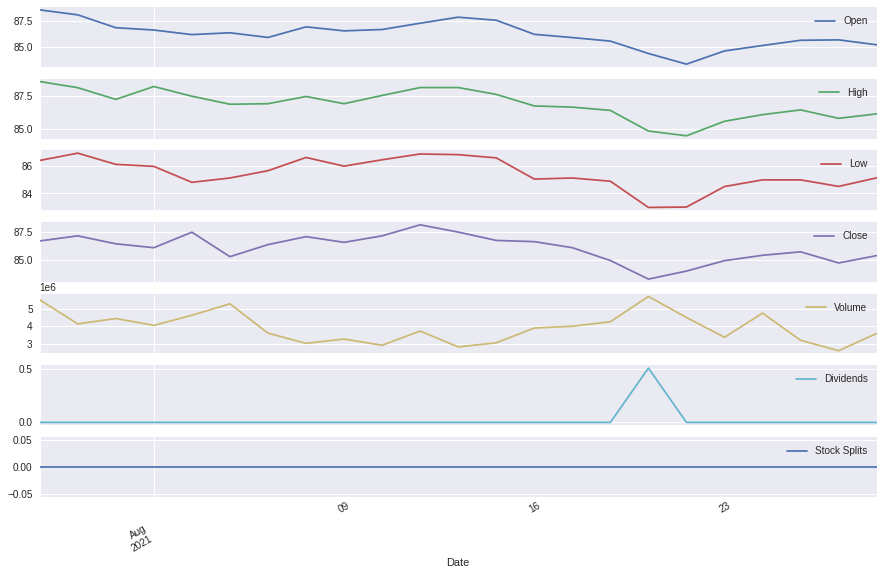

In [159]:
ticker_hist = ticker.history()
fig2 = ticker_hist.plot(kind = 'line',figsize = (15,10), subplots=True);
plt.savefig('history plot.png')